In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [98]:
df = pd.read_csv('movies_post_eda.csv')
df.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [99]:
df.drop(labels='genre_name',axis=1,inplace=True)


In [100]:
df.columns

Index(['budget', 'popularity', 'runtime', 'revenue', 'homepage_bool',
       'belongs_to_collection_bool', 'en_film', 'procoun_num',
       'usa_production', 'lang_num', 'released', 'has_tagline', 'cast_size',
       'crew_size', 'year', 'month', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'None', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [101]:
df.dtypes

budget                        float64
popularity                    float64
runtime                       float64
revenue                         int64
homepage_bool                   int64
belongs_to_collection_bool      int64
en_film                         int64
procoun_num                   float64
usa_production                  int64
lang_num                      float64
released                        int64
has_tagline                     int64
cast_size                     float64
crew_size                     float64
year                            int64
month                           int64
Action                          int64
Adventure                       int64
Animation                       int64
Comedy                          int64
Crime                           int64
Documentary                     int64
Drama                           int64
Family                          int64
Fantasy                         int64
Foreign                         int64
History     

In [106]:
print(df.isna().sum())
df.loc[df['lang_num'].isna(),'lang_num'] = 1

budget                        812
popularity                      0
runtime                         0
revenue                         0
homepage_bool                   0
belongs_to_collection_bool      0
en_film                         0
procoun_num                     0
usa_production                  0
lang_num                       20
released                        0
has_tagline                     0
cast_size                      13
crew_size                      16
year                            0
month                           0
Action                          0
Adventure                       0
Animation                       0
Comedy                          0
Crime                           0
Documentary                     0
Drama                           0
Family                          0
Fantasy                         0
Foreign                         0
History                         0
Horror                          0
Music                           0
Mystery       

We have other missing values that cannot be dealt with so easily – we want to get rid of them through inputation. First we'll split the data into train and test data so that information from the test data does not contaminate our inputation values.

In [107]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels='revenue',axis=1),df['revenue'],test_size = 0.3,random_state=42)

In [108]:
X_train.isna().sum()

budget                        581
popularity                      0
runtime                         0
homepage_bool                   0
belongs_to_collection_bool      0
en_film                         0
procoun_num                     0
usa_production                  0
lang_num                        0
released                        0
has_tagline                     0
cast_size                       9
crew_size                      12
year                            0
month                           0
Action                          0
Adventure                       0
Animation                       0
Comedy                          0
Crime                           0
Documentary                     0
Drama                           0
Family                          0
Fantasy                         0
Foreign                         0
History                         0
Horror                          0
Music                           0
Mystery                         0
None          

As we saw in EDA, all three of the features with missing values are highly right-skewed, so we will use median for inputation.

count    2091.000000
mean       20.622190
std        16.761421
min         0.000000
25%        11.000000
50%        16.000000
75%        24.000000
max       156.000000
Name: cast_size, dtype: float64
16.0


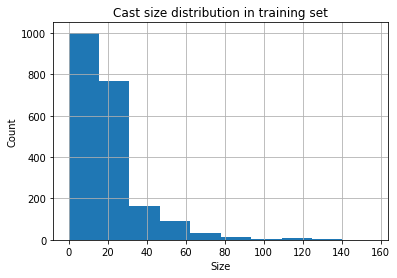

In [110]:

print(X_train['cast_size'].describe())
print(X_train['cast_size'].median())
X_train['cast_size'].hist()
plt.title('Cast size distribution in training set')
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

Because cast size is skewed right, we'll use median for inputation, as it's more outlier resistant. The same is true for crew size, as we know from our EDA, so we'll do the same for it as well. We will inpute the median from our training group to the test group's missing values as well.

In [111]:
X_test.isna().sum()

budget                        231
popularity                      0
runtime                         0
homepage_bool                   0
belongs_to_collection_bool      0
en_film                         0
procoun_num                     0
usa_production                  0
lang_num                        0
released                        0
has_tagline                     0
cast_size                       4
crew_size                       4
year                            0
month                           0
Action                          0
Adventure                       0
Animation                       0
Comedy                          0
Crime                           0
Documentary                     0
Drama                           0
Family                          0
Fantasy                         0
Foreign                         0
History                         0
Horror                          0
Music                           0
Mystery                         0
None          

In [113]:
cast_med = X_train['cast_size'].median()
X_train.loc[X_train['cast_size'].isna(),'cast_size'] = cast_med
X_test.loc[X_test['cast_size'].isna(),'cast_size'] = cast_med

In [114]:
crew_med = X_train['crew_size'].median()
X_train.loc[X_train['crew_size'].isna(),'crew_size'] = crew_med
X_test.loc[X_test['crew_size'].isna(),'crew_size'] = crew_med

All we have left with NAs is budget, which also has the same right skew issue. We will inpute medians there as well.

In [115]:
budg_med = X_train['budget'].median()
X_train.loc[X_train['budget'].isna(),'budget'] = budg_med
X_test.loc[X_test['budget'].isna(),'budget'] = budg_med

Now we have no more missing values.

We don't have any categorical variables left, so all we have to do is scale our data.

In [128]:
scaler = StandardScaler()
scaler.fit(X_train.values)
X_train_scaled = scaler.transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)
names = X_train.columns
X_train_scaled = pd.DataFrame(X_train_scaled,columns=names)
X_train_scaled.head()


,budget,popularity,runtime,homepage_bool,belongs_to_collection_bool,en_film,procoun_num,usa_production,lang_num,released,...,Horror,Music,Mystery,None,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,-0.491725,0.690304,1.789569,-0.686745,-0.503718,-2.435301,0.058491,-1.770271,0.601381,0.030875,...,-0.335094,-0.184319,-0.280326,-0.048853,2.097250,-0.326233,-0.021827,1.664391,-0.181538,-0.114125
1,-0.616556,-0.379484,1.304734,-0.686745,1.985240,0.410627,-0.961923,0.564885,-0.525202,0.030875,...,-0.335094,-0.184319,-0.280326,-0.048853,-0.476815,-0.326233,-0.021827,-0.600820,-0.181538,-0.114125
2,1.500690,0.497189,0.480514,-0.686745,-0.503718,0.410627,-0.451716,0.564885,-0.525202,0.030875,...,-0.335094,-0.184319,-0.280326,-0.048853,-0.476815,3.065296,-0.021827,1.664391,-0.181538,-0.114125
3,0.329091,-0.024625,0.480514,-0.686745,1.985240,0.410627,-0.961923,0.564885,-0.525202,0.030875,...,-0.335094,-0.184319,-0.280326,-0.048853,-0.476815,3.065296,-0.021827,1.664391,-0.181538,-0.114125
4,0.105930,-0.045193,0.335064,-0.686745,1.985240,-2.435301,-0.961923,-1.770271,-0.525202,0.030875,...,-0.335094,-0.184319,-0.280326,-0.048853,-0.476815,3.065296,-0.021827,-0.600820,-0.181538,-0.114125


In [133]:
X_test_scaled = pd.DataFrame(X_test_scaled,columns=names)
X_test_scaled.head()

,budget,popularity,runtime,homepage_bool,belongs_to_collection_bool,en_film,procoun_num,usa_production,lang_num,released,...,Horror,Music,Mystery,None,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,-0.633294,-0.650626,-0.877024,-0.686745,-0.503718,0.410627,-0.961923,0.564885,-0.525202,0.030875,...,-0.335094,-0.184319,-0.280326,-0.048853,-0.476815,-0.326233,-0.021827,-0.60082,-0.181538,-0.114125
1,-0.312499,-0.523672,-0.392189,-0.686745,-0.503718,0.410627,-0.451716,0.564885,1.727964,0.030875,...,-0.335094,-0.184319,-0.280326,-0.048853,-0.476815,-0.326233,-0.021827,-0.60082,-0.181538,-0.114125
2,-0.675136,-0.598178,-0.925507,-0.686745,-0.503718,-2.435301,-0.961923,-1.770271,-0.525202,0.030875,...,-0.335094,-0.184319,-0.280326,-0.048853,-0.476815,-0.326233,-0.021827,-0.60082,-0.181538,-0.114125
3,2.002804,-0.092723,0.528998,-0.686745,-0.503718,0.410627,0.568697,0.564885,0.601381,0.030875,...,-0.335094,-0.184319,-0.280326,-0.048853,-0.476815,-0.326233,-0.021827,-0.60082,-0.181538,-0.114125
4,-0.312499,-0.595688,-0.343705,-0.686745,1.985240,0.410627,-0.961923,-1.770271,-0.525202,0.030875,...,-0.335094,-0.184319,-0.280326,-0.048853,-0.476815,-0.326233,-0.021827,-0.60082,5.508474,-0.114125


In [139]:
X_train_scaled.to_csv('preprocessed_data/X_sc_train.csv')
X_test_scaled.to_csv('preprocessed_data/X_sc_test.csv')
y_train.to_csv('preprocessed_data/y_train.csv')
y_test.to_csv('preprocessed_data/y_test.csv')